In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

Using TensorFlow backend.


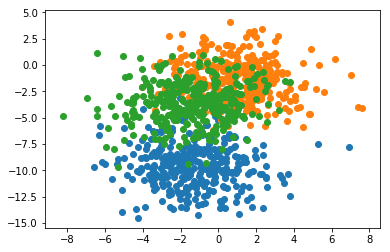

In [2]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
    # select indices of points with the class label
    row_ix = np.where(y == class_value)
    # scatter plot for points with a different color
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
plt.show()

# one hot encode output variable
y = to_categorical(y)

## Create Data

In [3]:
# prepare train and test dataset
def prepare_data():
    
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    
    return trainX, trainy, testX, testy

In [4]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()

## Create Simple MLP Model

In [5]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='test')
    plt.title('lrate='+str(lrate))
    plt.legend()

## Apply Learning Rate

In [6]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7] # use learning rate values between 0.0 to 1.0

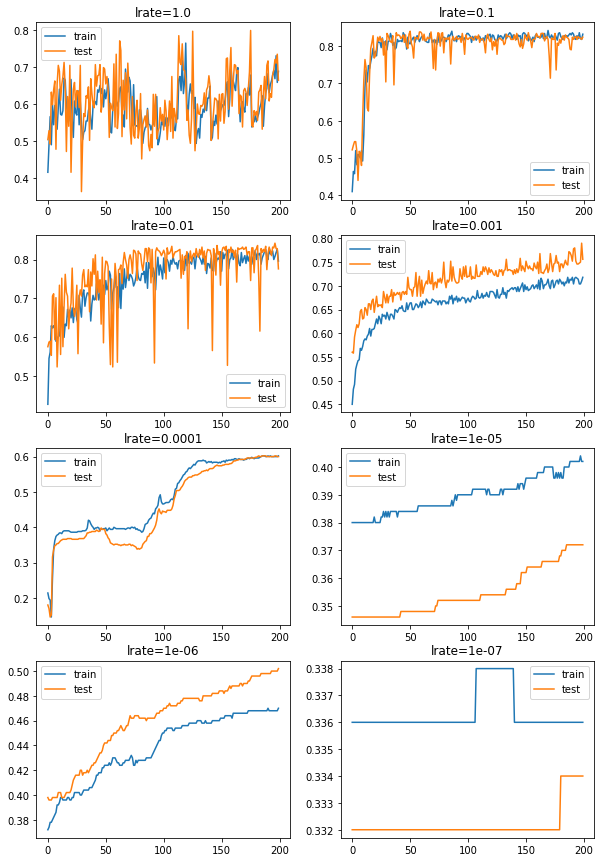

In [7]:
plt.figure(figsize=(10, 15))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(trainX, trainy, testX, testy, learning_rates[i])

# show learning curves
plt.show()

* The plots show oscillations in behavior for the too-large learning rate of 1.0 and the inability of the model to learn anything with the too-small learning rates of 1E-6 and 1E-7
* We can see that the model was able to learn the problem well with the learning rates 1E-1, 1E-2 and 1E-3, although successively slower as the learning rate was decreased
* With the chosen model configuration, the results suggest a moderate learning rate of 0.1 results in good model performance on the train and test sets

## Apply Momentum (lr=0.01)

In [8]:
# fit a model and plot learning curve
def fit_model_with_momentum(trainX, trainy, testX, testy, momentum):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='test')
    plt.title('momentum='+str(momentum))
    plt.legend()

In [9]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.8, 0.9, 0.99, 1.0] # use momentum values close to 1.0

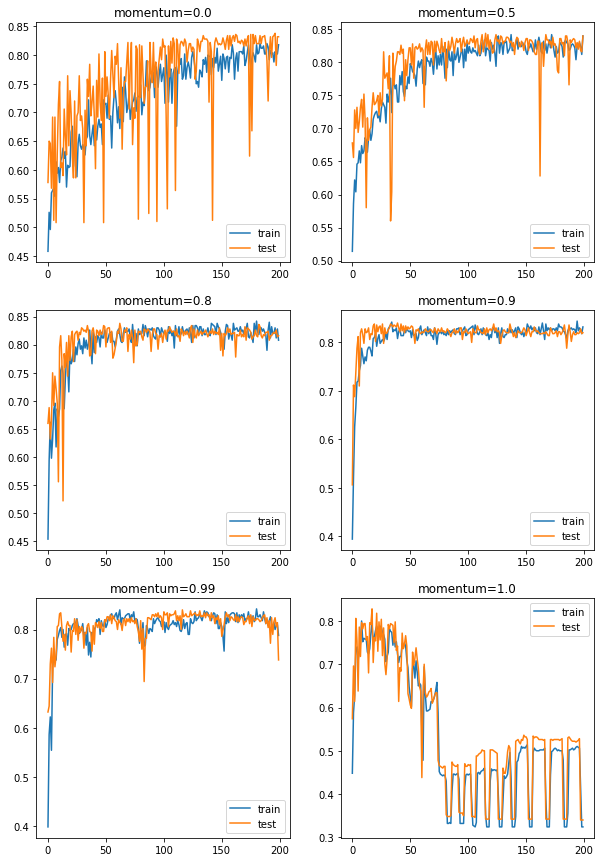

In [10]:
plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model_with_momentum(trainX, trainy, testX, testy, momentums[i])

# show learning curves
plt.show()

* Momentum values of 0.9 and 0.99 achieve reasonable train and test accuracy within about 50 training epochs as opposed to 200 training epochs when momentum is not used
* In all cases where momentum is used, the accuracy of the model on the holdout test dataset appears to be more stable, showing less volatility over the training epochs

## Apply Learning Rate Decay (lr=0.01)

In [11]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
    return initial_lrate * (1.0 / (1.0 + decay * iteration))

In [12]:
# create learning curves for different decay
global_decays = [1E-1, 1E-2, 1E-3, 1E-4]
local_decays = [1E-2, 3E-2, 5E-2, 7E-2, 9E-2, 1E-1]

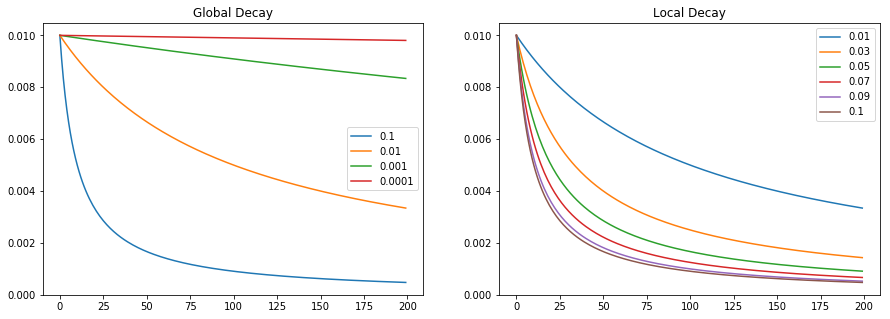

In [13]:
lrate = 0.01
n_updates = 200

plt.figure(figsize=(15, 5))

# set number plot
plt.subplot(121)
    
for decay in global_decays:
    
    # calculate learning rates for updates
    lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
    
    # plot result
    plt.plot(lrates, label=str(decay))
    plt.title('Global Decay')
    plt.legend()
    
# set number plot
plt.subplot(122)

for decay in local_decays:
    
    # calculate learning rates for updates
    lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
    
    # plot result
    plt.plot(lrates, label=str(decay))
    plt.title('Local Decay')
    plt.legend()
    
plt.show()

* We can see that in all cases, the learning rate starts at the initial value of 0.01 and we can see that a small decay value of 1E-4 (red) has almost no effect
* Whereas a large decay value of 1E-1 (blue) has a dramatic effect, reducing the learning rate to below 0.002 within 50 epochs and arriving at the final value of about 0.0004
* We can see that the change to the learning rate is not linear and that changes to the learning rate are dependent on the batch size (determining how many updates per epoch), after which an update is performed

In [14]:
# fit a model and plot learning curve
def fit_model_with_decay(trainX, trainy, testX, testy, decay):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='test')
    plt.title('decay='+str(decay))
    plt.legend()

In [15]:
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]

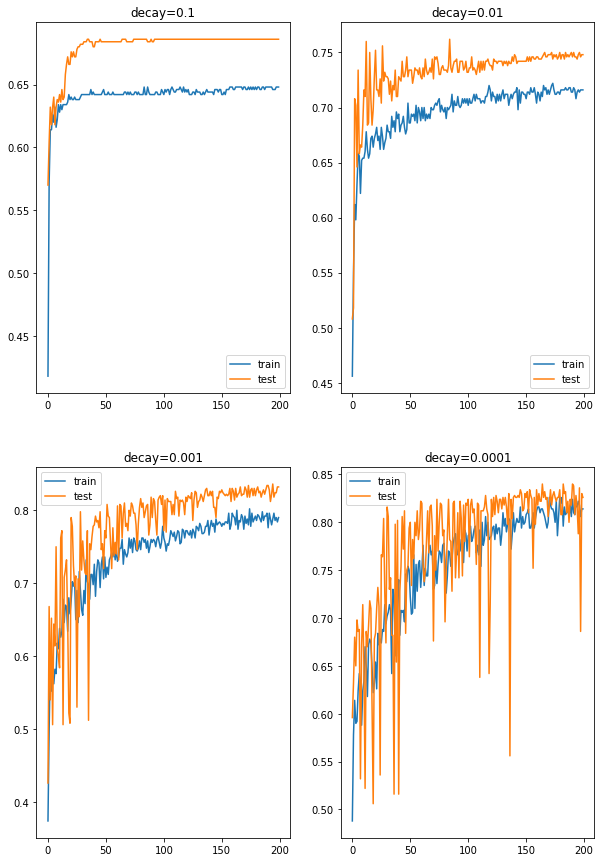

In [16]:
plt.figure(figsize=(10, 15))
for i in range(len(decay_rates)):

    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a decay rate
    fit_model_with_decay(trainX, trainy, testX, testy, decay_rates[i])

# show learning curves
plt.show()

* We can see that the large decay values of 1E-1 and 1E-2 indeed decay the learning rate too rapidly for this model on this problem and result in poor performance, the smaller decay values do result in better performance
* With the value of 1E-4 perhaps causing in a similar result as not using decay at all and, in fact, we can calculate the final learning rate with a decay of 1E-4 to be about 0.0075, only a little bit smaller than the initial value of 0.01

## Apply Adaptive Learning Rate (SGD, RMSProp, AdaGrad, Adam)

In [17]:
# fit a model and plot learning curve
def fit_model_with_adaptive(trainX, trainy, testX, testy, optimizer):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='test')
    plt.title('opt='+optimizer)
    plt.legend()

In [18]:
# create learning curves for different optimizers
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']

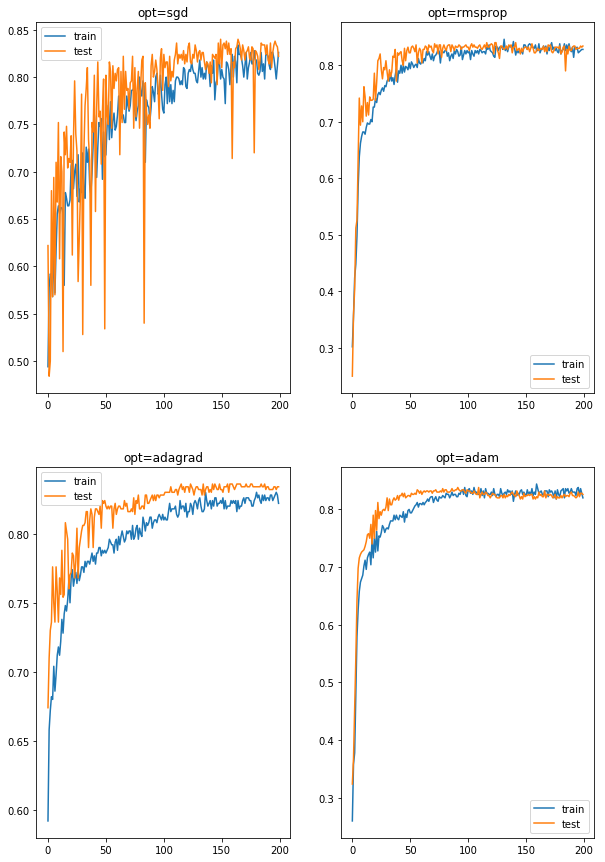

In [19]:
plt.figure(figsize=(10, 15))
for i in range(len(optimizers)):
    
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for an optimizer
    
    fit_model_with_adaptive(trainX, trainy, testX, testy, optimizers[i])

# show learning curves
plt.show()

* We can see that SGD with a default learning rate of 0.01 and no momentum does learn the problem, but requires nearly all 200 epochs and results in volatile accuracy on the training data and much more so on the test dataset
* The plots show that all three adaptive learning rate methods learning the problem faster and with dramatically less volatility in train and test set accuracy
* Both RMSProp and Adam demonstrate similar performance, effectively learning the problem within 50 training epochs and spending the remaining training time making very minor weight updates, but not converging as we saw with the learning rate schedules in the previous section

Credits to: [machinelearningmastery.com](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)

---